In [15]:
datasetsNames = {1:"3M"}
datasetNumber = 1

In [16]:
%run classes/GraphOrientation.ipynb
inputFolder = "Json"
outputFolderGeom = "JsonOriented"

In [17]:

graphOrientationGeometry = GraphOrientationGeometry(datasetsNames[datasetNumber], inputFolder, outputFolderGeom)

In [18]:
graphOrientationGeometry.readJsoneFile("Nodes")
graphOrientationGeometry.readJsoneFile("Pipes")

The file Nodes is opned correctly
The number of elements in the Nodes is 54603
The file Pipes is opned correctly
The number of elements in the Pipes is 55234


In [19]:
graphOrientationGeometry.orientationBasedOnGeometry()

In [6]:
graphOrientationGeometry.saveGraphInJson()

In [20]:
graphOrientationGeometry.describeGraph()

Number of nodes: 54603
Number of edges: 55234
+--------------------+-------------------+-------------------+
|   Component Number |   Number of Nodes |   Number of Edges |
+====================+===================+===================+
|                  1 |             33407 |             33977 |
+--------------------+-------------------+-------------------+
|                  2 |              2966 |              2985 |
+--------------------+-------------------+-------------------+
|                  3 |              1660 |              1668 |
+--------------------+-------------------+-------------------+
|                  4 |              1134 |              1139 |
+--------------------+-------------------+-------------------+
|                  5 |              2911 |              2927 |
+--------------------+-------------------+-------------------+
|                  6 |               905 |               909 |
+--------------------+-------------------+-------------------+
|        

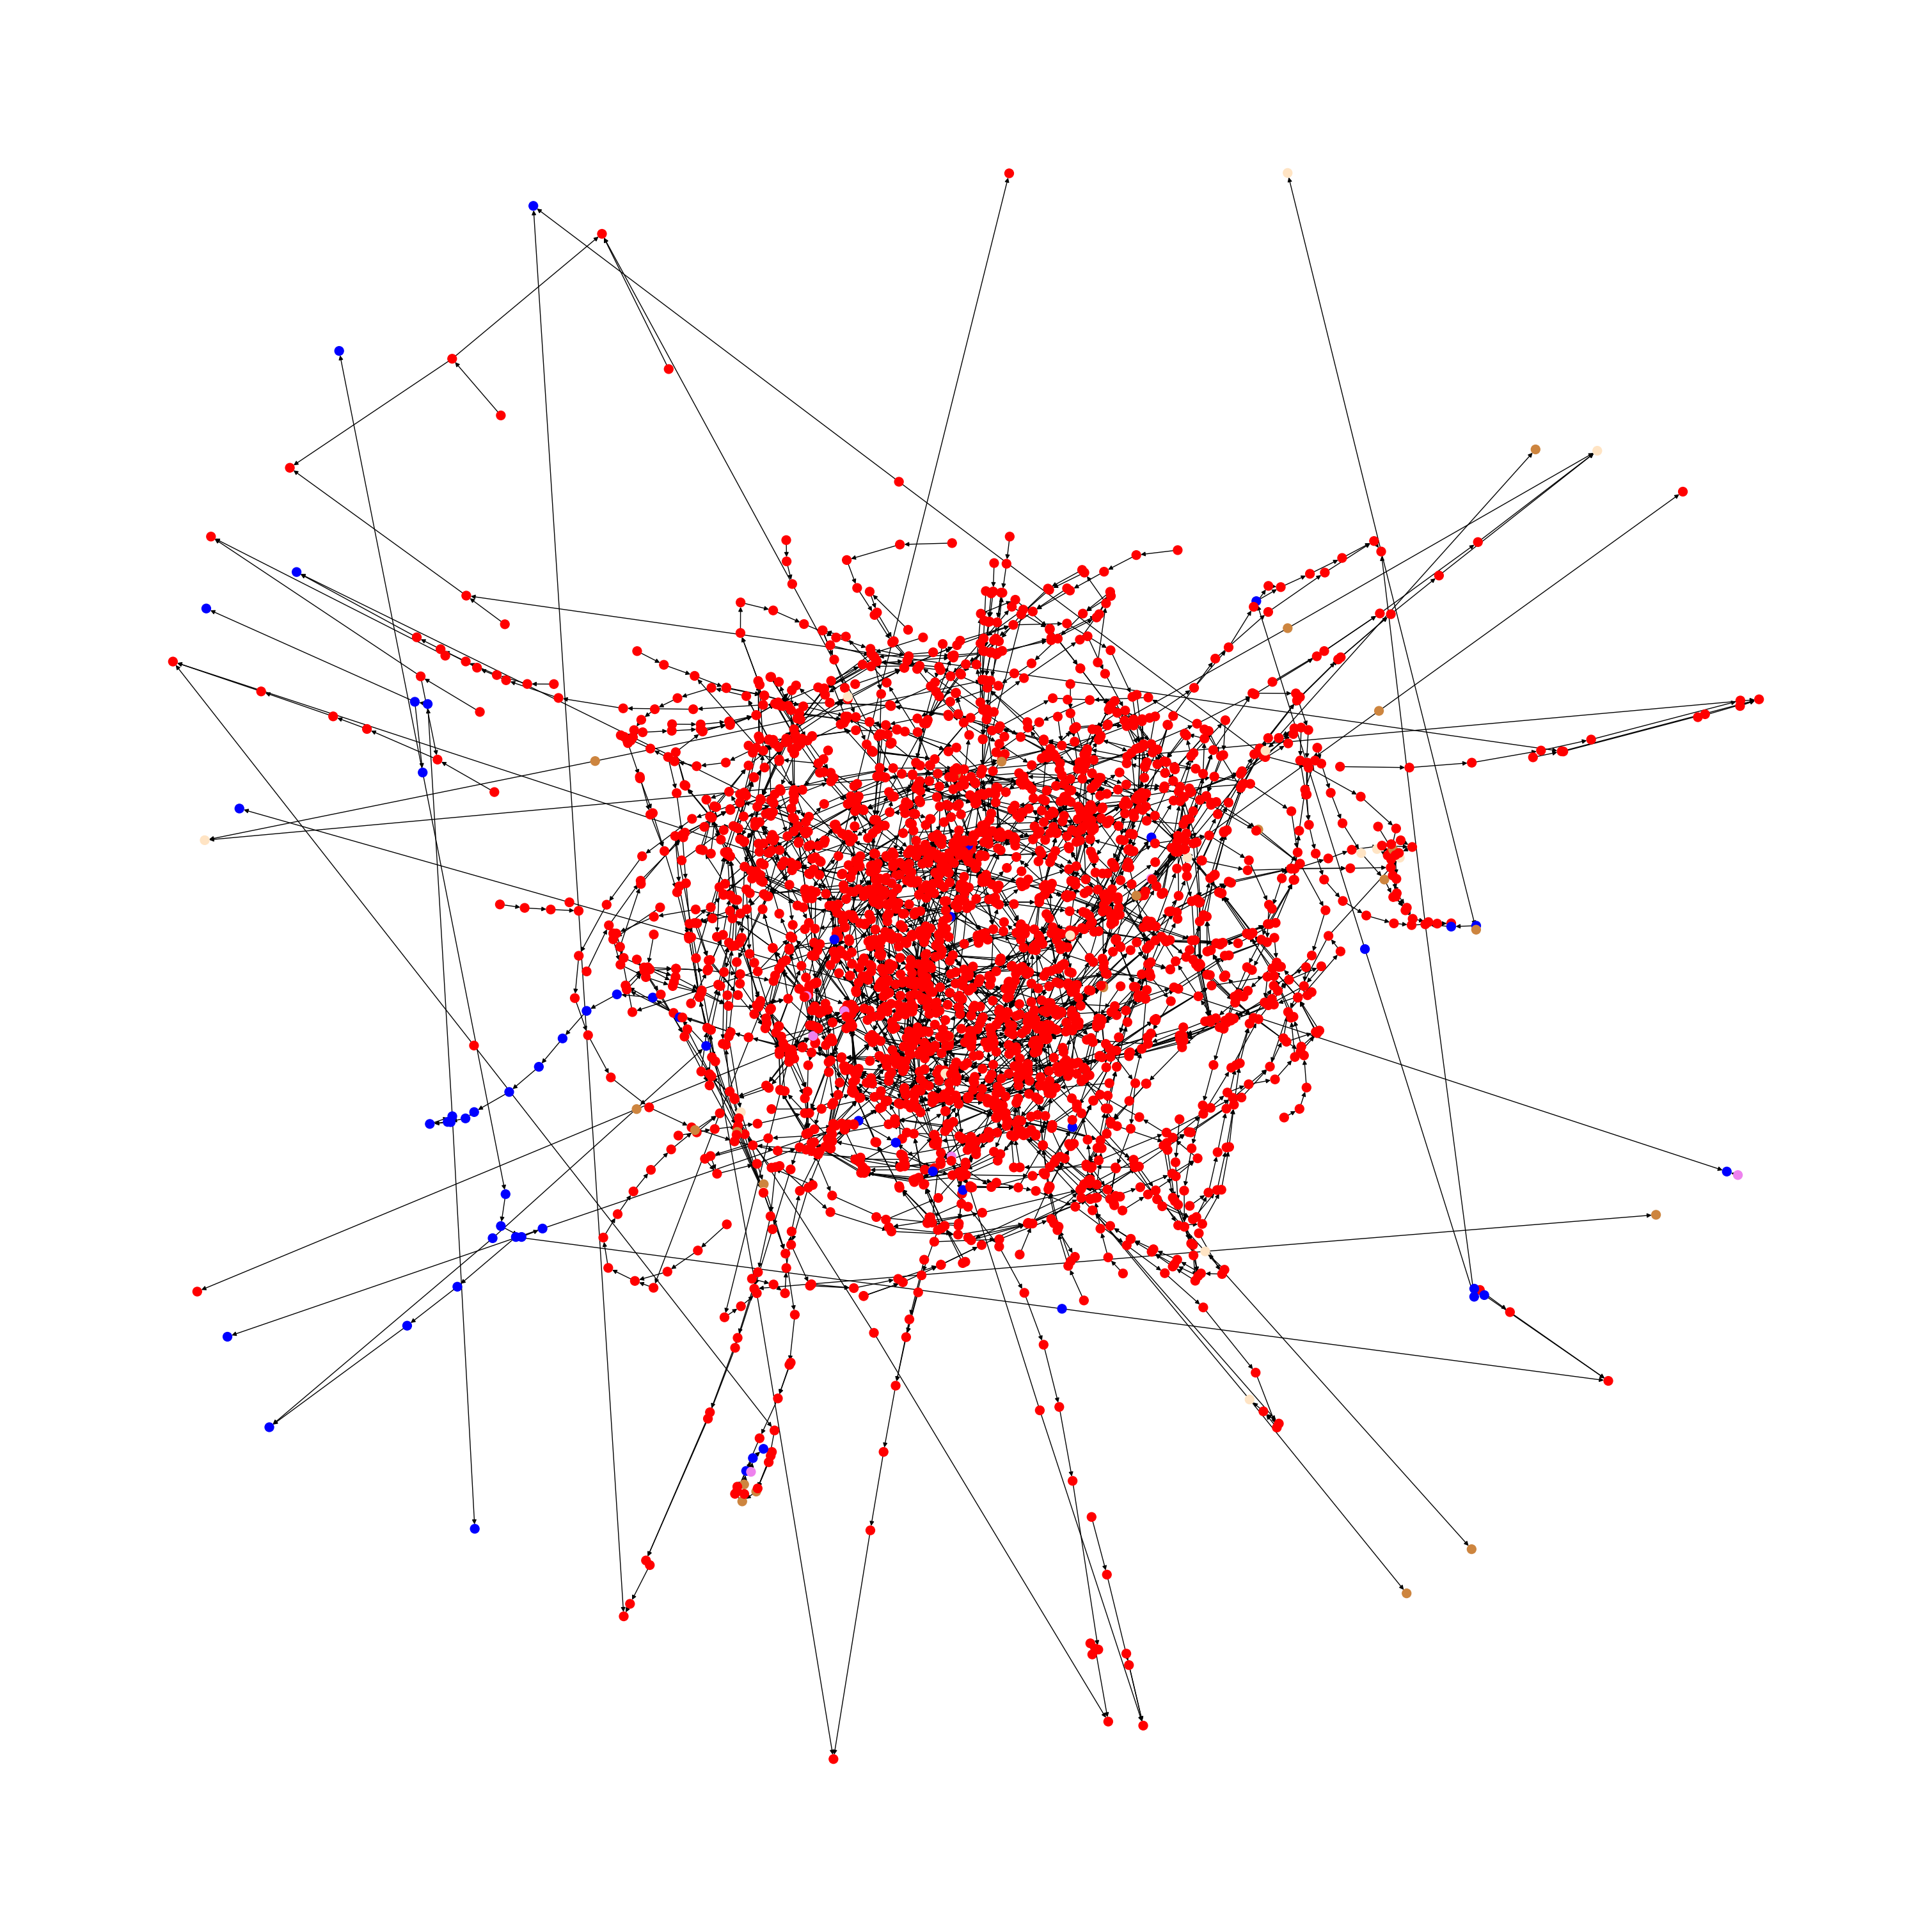

In [21]:
graphOrientationGeometry.plot_sub_graph_by_id(2)

In [21]:
#graphOrientationGeometry.plot_sub_graph_by_id(11)
#folder_path_REGALTI = "RGEALTI/3M_ZONE_1M_asc"
#graphOrientation.addElevationToNodes(folder_path)w
#graphOrientationElevation.addElevationToNodes(folder_path_REGALTI)

In [42]:
datasetsNames = {1:"1402", 2:"200213_3M_data", 3:"1704/M3M", 4:"200211_Veolia_M3M", 5:"3M"}
datasetNumber = 5
inputFolder = "JsonOrientedElev"
outputFolderElev = "JsonOrientedElev"
%run classes/GraphOrientation.ipynb

In [43]:
graphOrientationElevation = GraphOrientationElevation(datasetsNames[datasetNumber], inputFolder, outputFolderElev)

In [44]:
graphOrientationElevation.readJsoneFile("Nodes")
graphOrientationElevation.readJsoneFile("Pipes")

The file Nodes is opned correctly
The number of elements in the Nodes is 54603
The file Pipes is opned correctly
The number of elements in the Pipes is 55234


In [45]:
#folder_path_REGALTI = "RGEALTI/3M_ZONE_1M_asc"
#graphOrientationElevation.addElevationToNodes(folder_path_REGALTI)

In [46]:
graphOrientationElevation.orientationBasedElev()
graphOrientationElevation.getInfor()

54603
The number of bidirectional arcs: 1253
***************************
***************************
***************************
***************************
***************************
***************************
The edge is (28188, 54592)
All arcs [(54360, 54592), (11669, 54592), (28188, 54592), (54592, 28188)]
All arcs without (28188, 54592) and (54592, 28188) 
: [(54360, 54592), (11669, 54592)]
All arcs without bidirectional 
: [(54360, 54592), (11669, 54592)]
***************************
***************************
***************************
***************************
***************************
***************************
***************************
***************************
***************************
***************************
***************************
The edge is (20591, 34750)
All arcs [(34750, 20591), (20591, 34750), (20591, 38738), (20588, 20591)]
All arcs without (20591, 34750) and (34750, 20591) 
: [(20591, 38738), (20588, 20591)]
All arcs without bidirectional 
: [(

In [ ]:
#graphOrientationElevation.describeGraph()

In [35]:
#graphOrientationElevation.saveGraphInJson()

In [29]:
graphOrientationElevation.describeGraph()

Number of nodes: 54603
Number of edges: 55234
+--------------------+-------------------+-------------------+
|   Component Number |   Number of Nodes |   Number of Edges |
+====================+===================+===================+
|                  1 |             33407 |             33977 |
+--------------------+-------------------+-------------------+
|                  2 |              2966 |              2985 |
+--------------------+-------------------+-------------------+
|                  3 |              1660 |              1668 |
+--------------------+-------------------+-------------------+
|                  4 |              1134 |              1139 |
+--------------------+-------------------+-------------------+
|                  5 |              2911 |              2927 |
+--------------------+-------------------+-------------------+
|                  6 |               905 |               909 |
+--------------------+-------------------+-------------------+
|        

In [16]:
import networkx as nx

def graph_similarity(graph1, graph2):
    # Extract node IDs from both graphs
    nodes_g1 = set(graph1.nodes())
    nodes_g2 = set(graph2.nodes())

    # Calculate Jaccard similarity for node IDs
    nodes_jaccard_similarity = len(nodes_g1.intersection(nodes_g2)) / len(nodes_g1.union(nodes_g2))

    # Extract edge pairs (source, target) from both graphs
    edges_g1 = set(graph1.edges())
    edges_g2 = set(graph2.edges())

    # Calculate Jaccard similarity for edge pairs
    edges_jaccard_similarity = len(edges_g1.intersection(edges_g2)) / len(edges_g1.union(edges_g2))

    return nodes_jaccard_similarity, edges_jaccard_similarity

nodes_similarity, edges_similarity = graph_similarity(graphOrientationGeometry.graphBasedGeometry, graphOrientationElevation.graphBasedElevation )


print(f"Nodes Jaccard Similarity: {nodes_similarity}")
print(f"Edges Jaccard Similarity: {edges_similarity}")

Nodes Jaccard Similarity: 1.0
Edges Jaccard Similarity: 0.6679450400120791


In [17]:
import networkx as nx

def get_dissimilar_edges(graph1, graph2):
    edges_g1 = set(graph1.edges())
    edges_g2 = set(graph2.edges())

    dissimilar_edges_g1 = edges_g1 - edges_g2
    dissimilar_edges_g2 = edges_g2 - edges_g1

    return dissimilar_edges_g1, dissimilar_edges_g2


dissimilar_edges_g1, dissimilar_edges_g2 = get_dissimilar_edges(graphOrientationGeometry.graphBasedGeometry, graphOrientationElevation.graphBasedElevation )

print(f"Dissimilar edges in G1: {len(dissimilar_edges_g1)}")
print(f"Dissimilar edges in G2: {len(dissimilar_edges_g2)}")

print(f"Dissimilar edges in G1: {dissimilar_edges_g1}")
print(f"Dissimilar edges in G2: {dissimilar_edges_g2}")


Dissimilar edges in G1: 10996
Dissimilar edges in G2: 10996
Dissimilar edges in G1: {(30812, 30808), (20930, 39680), (40240, 40233), (29878, 12739), (24746, 24740), (10390, 10379), (1032, 36927), (32391, 45124), (25453, 49448), (44627, 32629), (23704, 47933), (32577, 38346), (46872, 37650), (30923, 27535), (14542, 16972), (50485, 50489), (50347, 42648), (6043, 6741), (20902, 45071), (28529, 13945), (50588, 50587), (44556, 49085), (34250, 34244), (23634, 23378), (28817, 48054), (92, 45471), (5439, 10912), (10759, 52101), (50544, 43835), (30825, 30760), (14867, 14675), (54192, 54194), (32022, 18179), (54443, 13883), (40869, 24138), (54104, 54081), (15363, 52934), (39366, 19158), (7651, 7650), (21312, 52940), (20278, 1685), (53951, 54216), (52836, 52839), (51456, 51457), (4400, 2067), (11477, 35994), (46821, 18184), (43458, 43457), (46306, 29109), (42000, 49554), (501, 161), (27657, 32688), (8088, 10741), (54199, 54210), (47398, 43078), (15341, 6169), (6991, 9418), (52670, 52668), (39699,

In [18]:
import networkx as nx

def get_dissimilar_nodes(graph1, graph2):
    edges_g1 = set(graph1.edges())
    edges_g2 = set(graph2.edges())

    dissimilar_edges_g1 = edges_g1 - edges_g2

    # Extract nodes from dissimilar edges in G1
    dissimilar_nodes_g1 = set(node for edge in dissimilar_edges_g1 for node in edge)

    return dissimilar_nodes_g1

dissimilar_nodes_g1 = get_dissimilar_nodes(graphOrientationGeometry.graphBasedGeometry, graphOrientationElevation.graphBasedElevation)

print(f"Dissimilar nodes in G1: {len(dissimilar_nodes_g1)}")
print(f"Dissimilar nodes in G1: {dissimilar_nodes_g1}")

Dissimilar nodes in G1: 17015
Dissimilar nodes in G1: {32770, 32773, 32774, 32775, 8, 9, 10, 32778, 6, 14, 15, 16, 32787, 32790, 23, 22, 26, 31, 32800, 32, 36, 32809, 41, 43, 32813, 47, 49, 32817, 32819, 32821, 32824, 32825, 59, 32831, 32834, 67, 32836, 75, 32844, 78, 79, 32846, 82, 88, 92, 32864, 96, 99, 32868, 32867, 32871, 32872, 106, 107, 108, 112, 114, 32882, 32883, 115, 32884, 122, 32891, 124, 32893, 127, 128, 129, 32898, 32897, 132, 32900, 137, 138, 32910, 32911, 144, 145, 32915, 148, 149, 32919, 32921, 32923, 156, 32926, 32927, 160, 161, 32929, 163, 164, 167, 32935, 32936, 170, 171, 32939, 177, 32947, 180, 181, 182, 186, 187, 191, 192, 32961, 32963, 32964, 32965, 198, 195, 32968, 201, 202, 32972, 209, 32980, 213, 217, 32985, 32987, 220, 223, 32992, 224, 227, 32996, 32997, 230, 32998, 33000, 228, 33002, 33004, 239, 33008, 240, 241, 242, 245, 33014, 33018, 33019, 33020, 254, 33025, 33026, 33028, 260, 33030, 262, 33033, 267, 33037, 33038, 269, 272, 274, 275, 33042, 33044, 33043, 3

In [20]:
import geopandas as gpd
from shapely.geometry import Point

def filter_and_save_nodes(input_geojson_path, dissimilar_nodes_list, output_geojson_path):
    # Read the original GeoJSON file into a GeoDataFrame
    gdf = gpd.read_file(input_geojson_path)

    # Convert dissimilar_nodes_list to a set for efficient membership checking
    dissimilar_nodes_set = set(dissimilar_nodes_list)

    # Filter nodes based on dissimilar_nodes_list
    filtered_nodes = gdf[gdf['id'].isin(dissimilar_nodes_set)]

    # Create a new GeoDataFrame with the filtered nodes
    filtered_gdf = gpd.GeoDataFrame(filtered_nodes, geometry=gdf.geometry)

    # Save the filtered nodes to a new GeoJSON file
    filtered_gdf.to_file(output_geojson_path, driver='GeoJSON')

# Example usage:
input_geojson_path = 'Data SIG/3M/JsonOrientedElev/Nodes.geojson'
output_geojson_path = 'Data SIG/3M/JsonOrientedElev/filtered_nodes.geojson'

filter_and_save_nodes(input_geojson_path, list(dissimilar_nodes_g1), output_geojson_path)


In [17]:
nx.write_graphml(graphOrientationElevation.graphBasedElevation, "Data SIG/3M/JsonOrientedElev/graph.graphml")
nx.write_graphml(graphOrientationGeometry.graphBasedGeometry, "Data SIG/3M/JsonOriented/graph.graphml")

In [59]:
def graph_similarity(graph1, graph2):
    # Extract node IDs from both graphs
    nodes_g1 = set(graph1.nodes())
    nodes_g2 = set(graph2.nodes())

    # Calculate Jaccard similarity for node IDs
    nodes_jaccard_similarity = len(nodes_g1.intersection(nodes_g2)) / len(nodes_g1.union(nodes_g2))

    # Extract edge pairs (source, target) from both graphs
    edges_g1 = set(graph1.edges())
    edges_g2 = set(graph2.edges())

    # Calculate Jaccard similarity for edge pairs
    edges_jaccard_similarity = len(edges_g1.intersection(edges_g2)) / len(edges_g1.union(edges_g2))

    return nodes_jaccard_similarity, edges_jaccard_similarity

nodes_similarity, edges_similarity = graph_similarity(graphOrientationGeometry.graphBasedGeometry, graphOrientationElevation.graphBasedElevation )


print(f"Nodes Jaccard Similarity: {nodes_similarity}")
print(f"Edges Jaccard Similarity: {edges_similarity}")

Nodes Jaccard Similarity: 1.0
Edges Jaccard Similarity: 0.6679450400120791


In [35]:
import json

In [18]:
G = nx.read_graphml("Data SIG/3M/JsonOrientedElev/graph.graphml")
edges_to_remove = []
nodes_involved = set()


In [19]:
for edge in G.edges():
    source , target = edge
    #print(f'Source {source}\nTarget {target}')
    # Get all outgoing edges from the target node
    outgoing_edges = list(G.out_edges(target))

    # Get all incoming edges to the target node
    incoming_edges = list(G.in_edges(source))

    if not outgoing_edges and not incoming_edges:
        print(edge)
        # Add the edge to the list of edges to remove
        edges_to_remove.append((source, target))
        nodes_involved.add(int(source))
        nodes_involved.add(int(target))
for edge in edges_to_remove:
    G.remove_edge(*edge)
    G.add_edge(edge[1], edge[0])

('22580', '22556')
('47931', '945')
('22728', '24439')
('37593', '24439')
('16359', '50102')
('16359', '15302')
('51277', '8693')
('20728', '52950')
('67', '64')
('31160', '49964')
('1086', '36037')
('50671', '50621')
('9264', '9259')
('50493', '36217')
('51552', '9270')
('16027', '5515')
('6832', '6553')
('6832', '9054')
('23245', '6553')
('39720', '2629')
('39720', '45556')
('25822', '8855')
('35508', '49653')
('10912', '5439')
('10912', '10950')
('5141', '53086')
('45344', '2375')
('48524', '41429')
('11192', '11276')
('8686', '8684')
('11770', '11819')
('39146', '39147')
('51434', '41113')
('41114', '41113')
('41114', '41079')
('54412', '38844')
('35862', '20231')
('13045', '13044')
('52316', '52318')
('5408', '5415')
('51225', '51646')
('14648', '53172')
('3317', '53172')
('18789', '11890')
('15189', '7026')
('39189', '39446')
('25272', '25260')
('7690', '21375')
('17919', '8737')
('21448', '21447')
('21354', '21353')
('50097', '21353')
('53632', '53631')
('53640', '53639')
('2138

In [89]:
print(len(list(nodes_involved)))

7155


In [64]:
G.nodes()

NodeView(('49641', '48061', '30204', '25147', '22566', '22580', '22560', '22556', '2675', '18312', '3691', '18310', '22592', '22604', '47330', '22579', '22687', '23223', '21679', '107229', '26091', '26065', '26085', '16838', '22699', '24812', '27340', '8153', '45301', '22919', '33536', '46322', '34086', '44760', '20087', '38582', '47995', '47775', '18201', '47340', '49635', '2659', '565', '658', '19088', '666', '22573', '13072', '23335', '3249', '2906', '39297', '21981', '39309', '22812', '45462', '22795', '15932', '54533', '945', '25265', '47931', '24439', '22728', '37593', '38631', '2374', '21630', '5099', '35907', '17030', '21695', '50102', '22963', '16359', '53820', '53822', '8690', '51281', '51279', '924', '51280', '51276', '51277', '8693', '51278', '17153', '14043', '15191', '14037', '16241', '9163', '52950', '8837', '20728', '8815', '11506', '1612', '52365', '11504', '52363', '92', '45471', '34933', '88', '25302', '25303', '25307', '1013', '64', '67', '65', '59', '53982', '50390